In [14]:
# understanding gradient descent types
# batch gradient descent 
# stochastic gradient descent
# mini batch gradient desccent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('assets/homeprices_bangalore.csv')
df.sample(5)

,area,bedrooms,price
17,1540,3,60.0
15,1175,2,42.0
19,800,1,32.0
7,3300,4,155.0
11,2785,4,140.0


In [10]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [64]:
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [13]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size=0.2)

In [66]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        y_predicted = np.dot(w,X.T)+b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
        


In [67]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

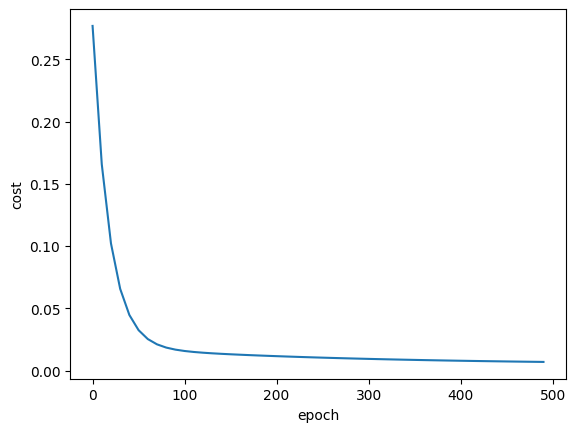

In [68]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [69]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    

In [70]:
predict(2600,4, w, b)

/home/ubuntu/anaconda3/envs/ML-projects/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [74]:
import random

In [75]:
from random import sample


def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w,sample_x.T)+b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y-y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


In [78]:
w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

w, b, cost

(array([0.70767405, 0.67412644]), -0.23001576464204285, 0.004813303670906773)

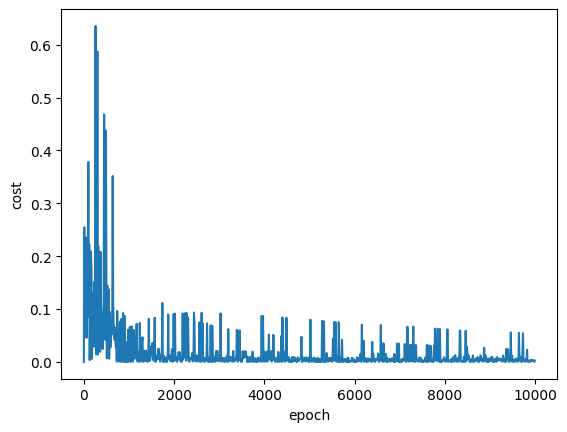

In [83]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)